## Regression

In this lecture, I will bring together various techniques for feature engineering that we have covered in this course to tackle a regression problem. This would give you an idea of the end-to-end pipeline to build machine learning algorithms for regression.

===================================================================================================

## Real Life example: 

### Predicting Sale Price of Houses

The problem at hand aims to predict the final sale price of homes based on different explanatory variables describing aspects of residential homes. Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.

To download the House Price dataset go this website:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset.
Save it to a directory of your choice.

**Note that you need to be logged in to Kaggle in order to download the datasets**.

If you save it in the same directory from which you are running this notebook and name the file 'houseprice.csv' then you can load it the same way I will load it below.

====================================================================================================

## House Prices dataset

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# for tree binarisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import mean_squared_error

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Load the dataset for submission (the one on which our model will be evaluated by Kaggle)
# it contains exactly the same variables, but not the target

submission = pd.read_csv('test.csv')
submission.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The House Price dataset is bigger than the Titanic dataset. It contains more variables for each one of the houses. Thus, manual inspection of each one of them is a bit time demanding. Therefore, here instead of deciding variable by variable what is the best way to proceed, I will try to automate the feature engineering pipeline, making some a priori decisions on when I will apply one technique or the other, and then expanding them to the entire dataset.

### Types of variables (section 2)

Let's go ahead and find out what types of variables there are in this dataset

In [4]:
# let's inspect the type of variables in pandas
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

There are a mixture of categorical and numerical variables. Numerical are those of type int and float. Categorical those of type object.

In [5]:
print('Number of House Id labels: ', len(data.Id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  1460
Number of Houses in the Dataset:  1460


Id is a unique identifier for each of the houses. Thus this is not a variable that we can use.

In [6]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 43 categorical variables


In [7]:
# find numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 38 numerical variables


#### Find discrete variables

To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number of distinct values. See below.

In [8]:
# let's visualise the values of the discrete variables
discrete = []
for var in numerical:
    if len(data[var].unique())<20:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath  values:  [1 0 2 3]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr  values:  [1 2 3 0]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 0 4]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold  values:  [2008 2007 2006 2009 2010]
There are 15 discrete variables


### Types of problems within the variables (section 3)

#### Missing values

In [9]:
# let's visualise the percentage of missing values
for var in data.columns:
    if data[var].isnull().sum()>0:
        print(var, data[var].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [10]:
# let's inspect the type of those variables with a lot of missing information
for var in data.columns:
    if data[var].isnull().mean()>0.80:
        print(var, data[var].unique())

Alley [nan 'Grvl' 'Pave']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


There are a few variables with missing data. The ones with a lot of missing data are categorical variables. We will need to fill those out. See below.

#### Outliers

In [11]:
continuous = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice']]
continuous

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

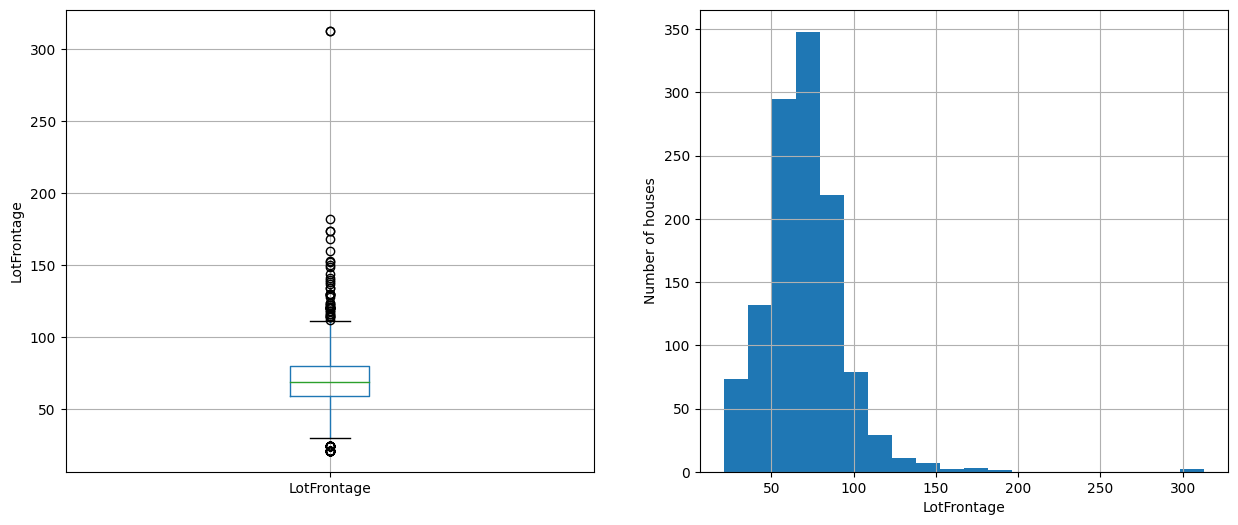

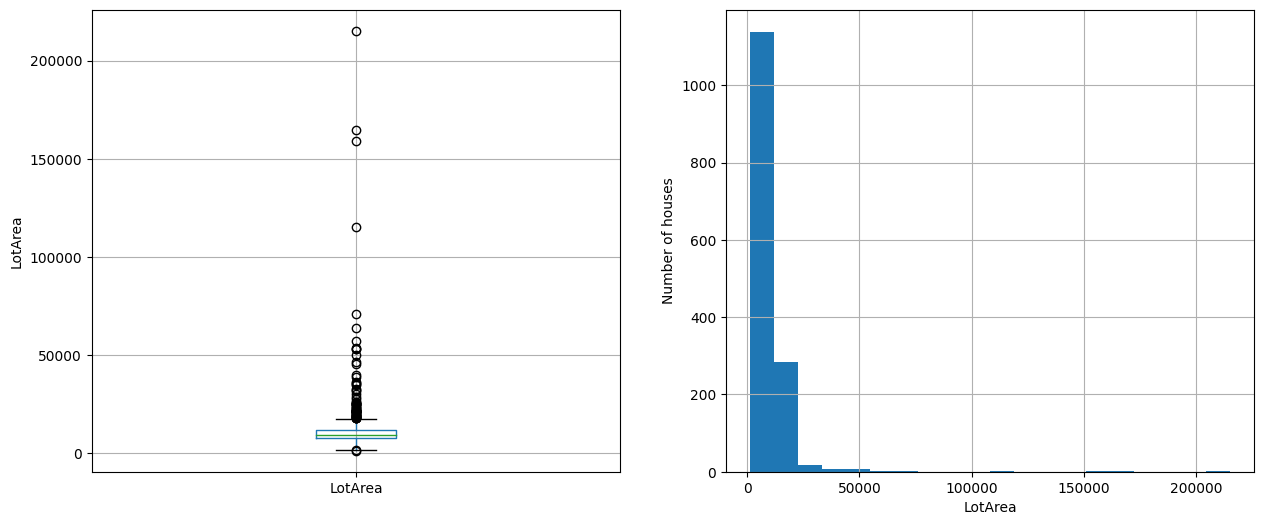

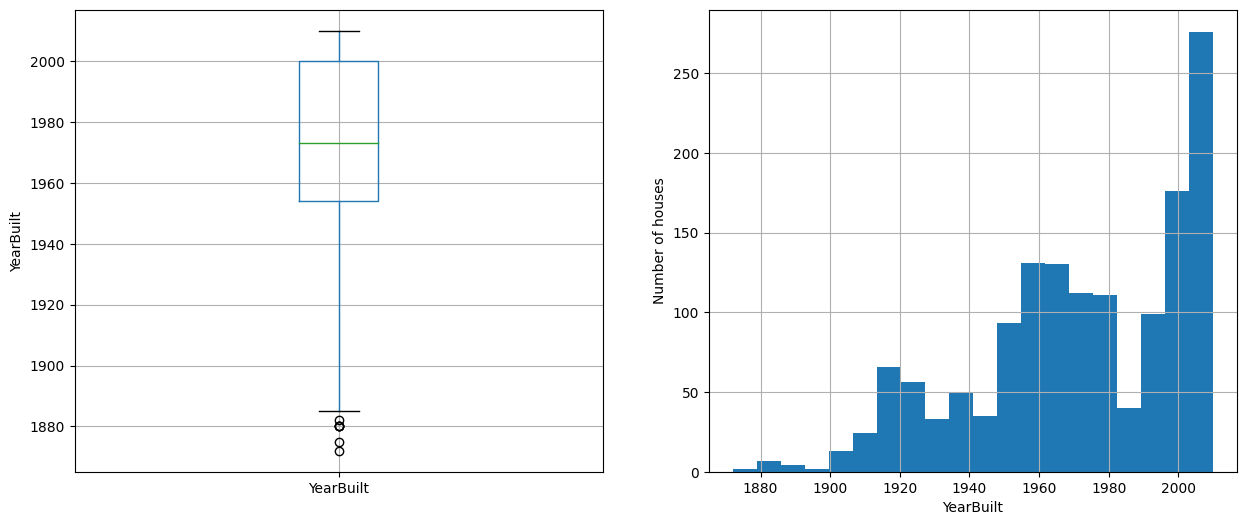

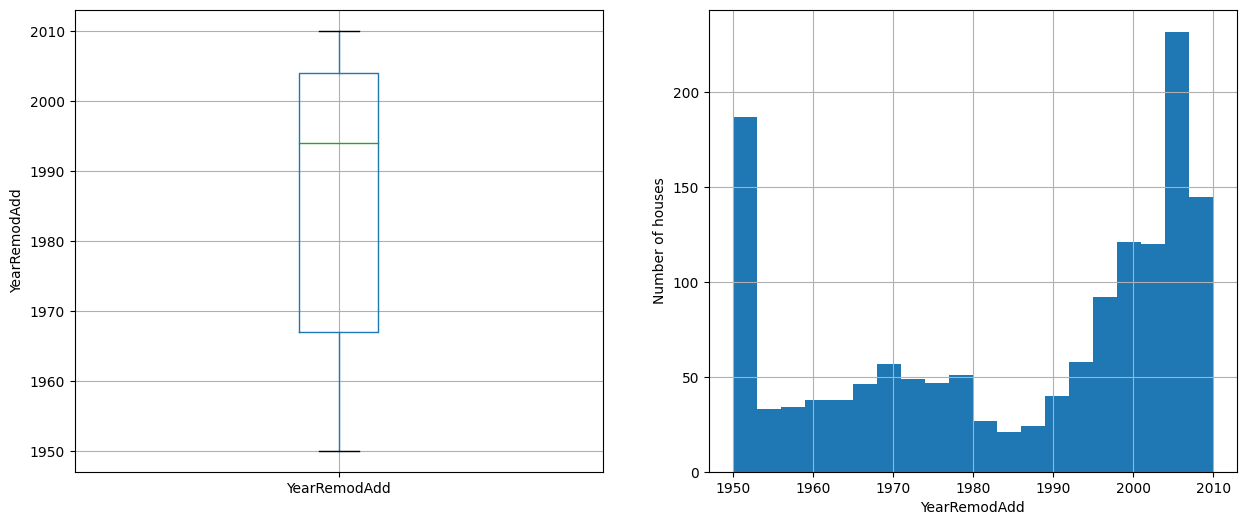

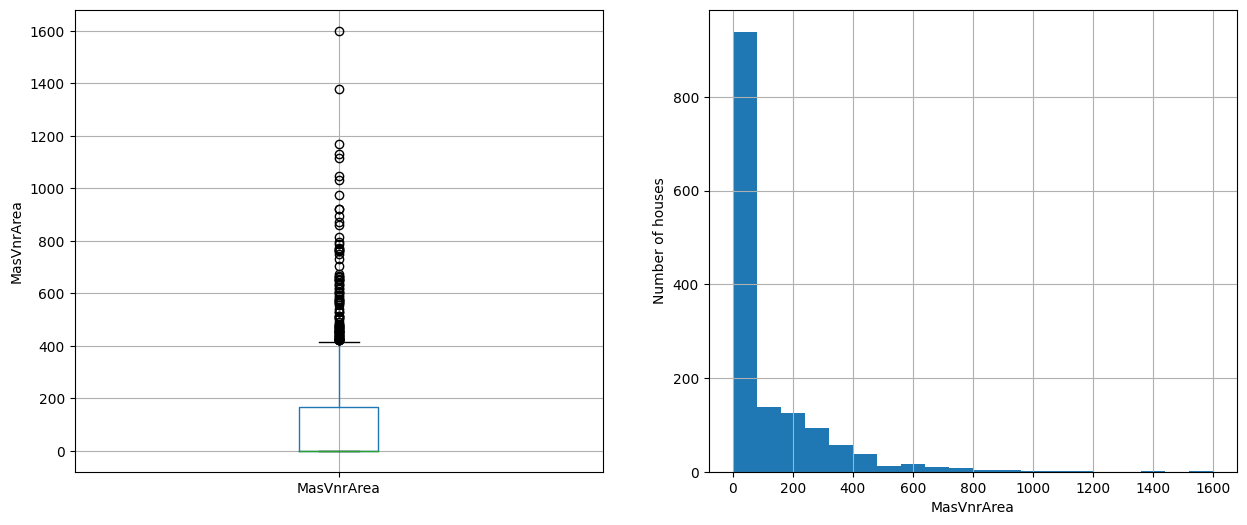

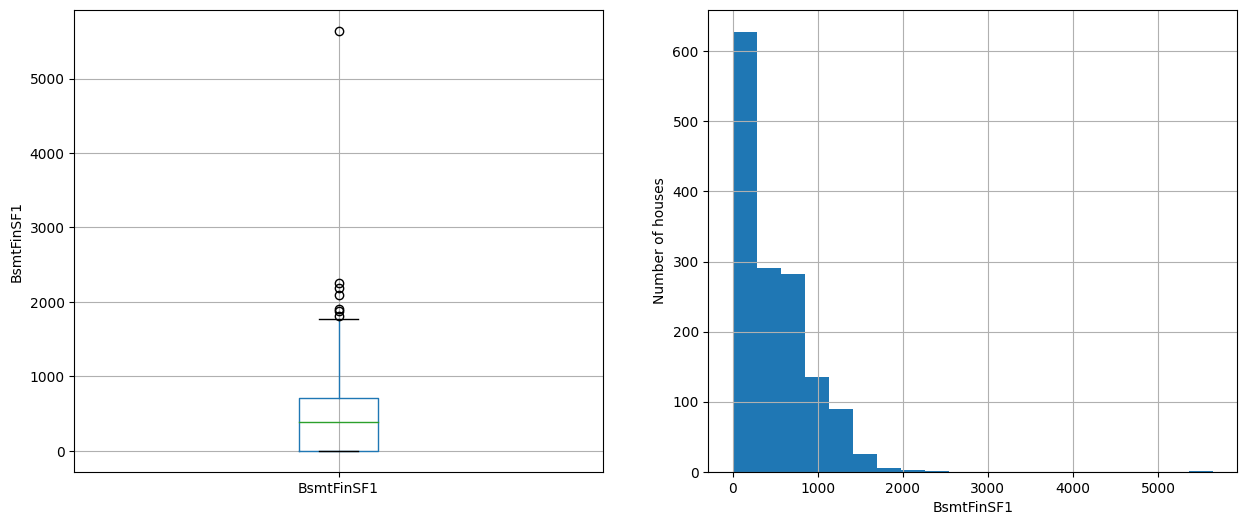

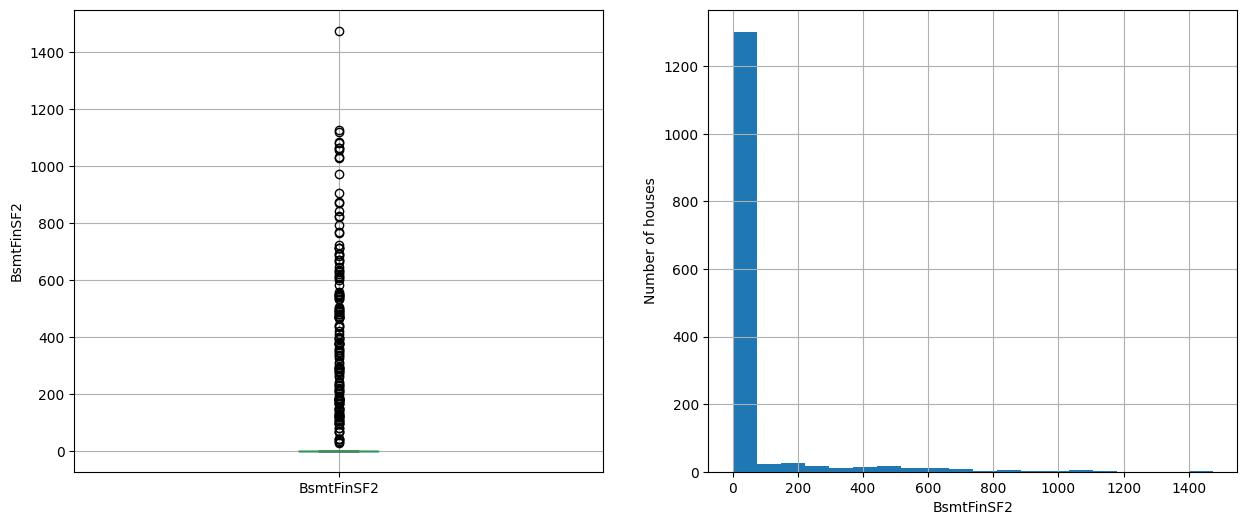

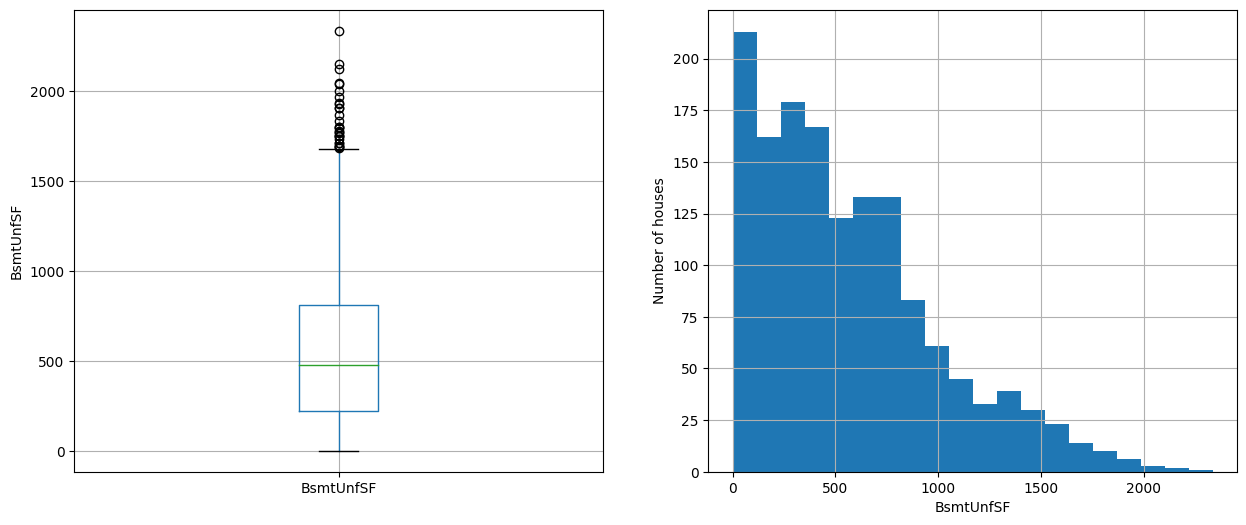

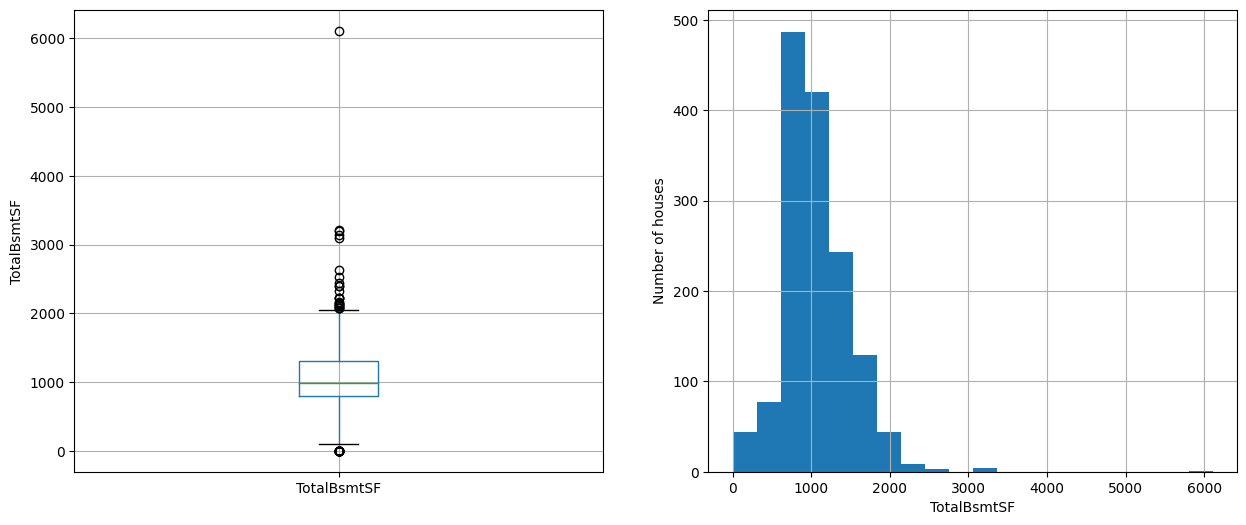

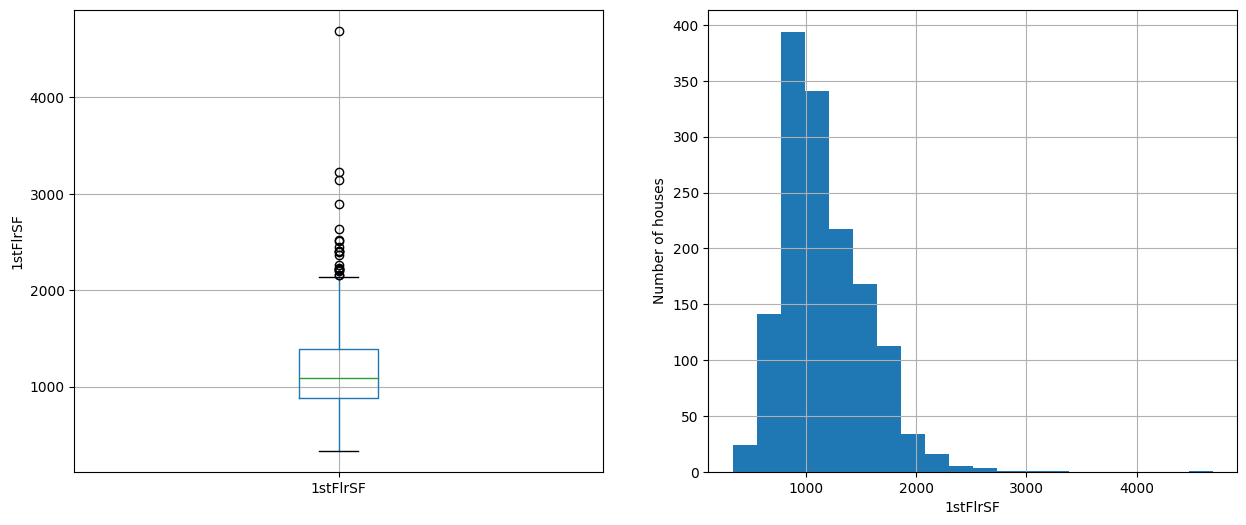

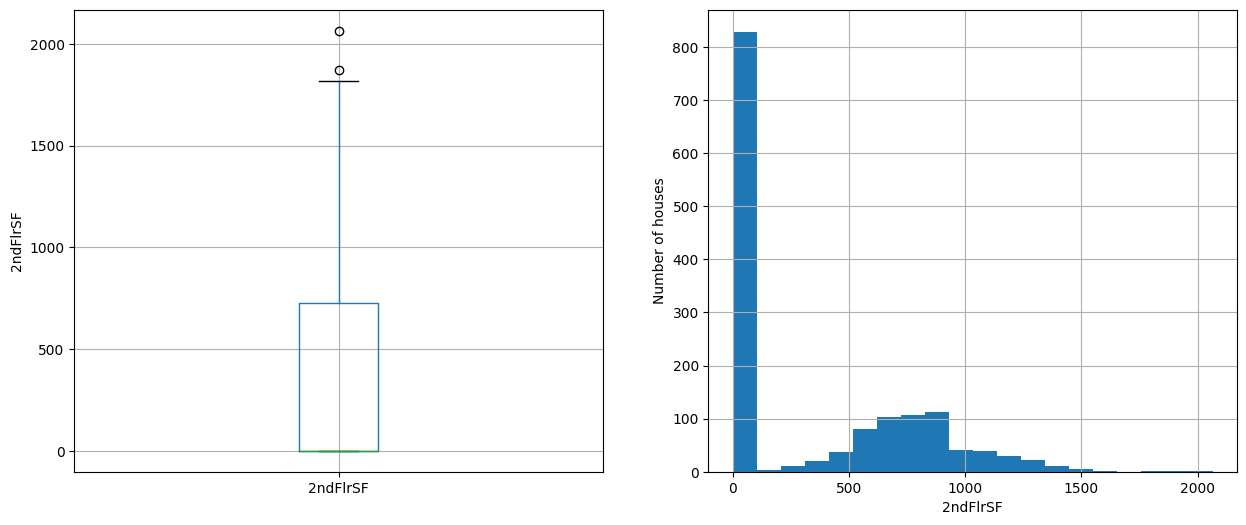

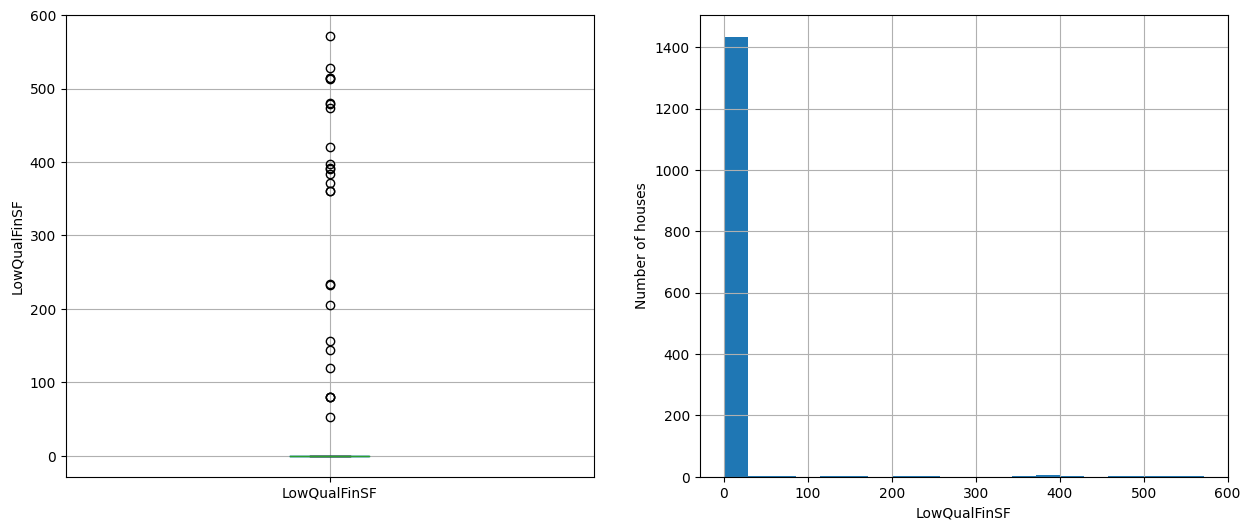

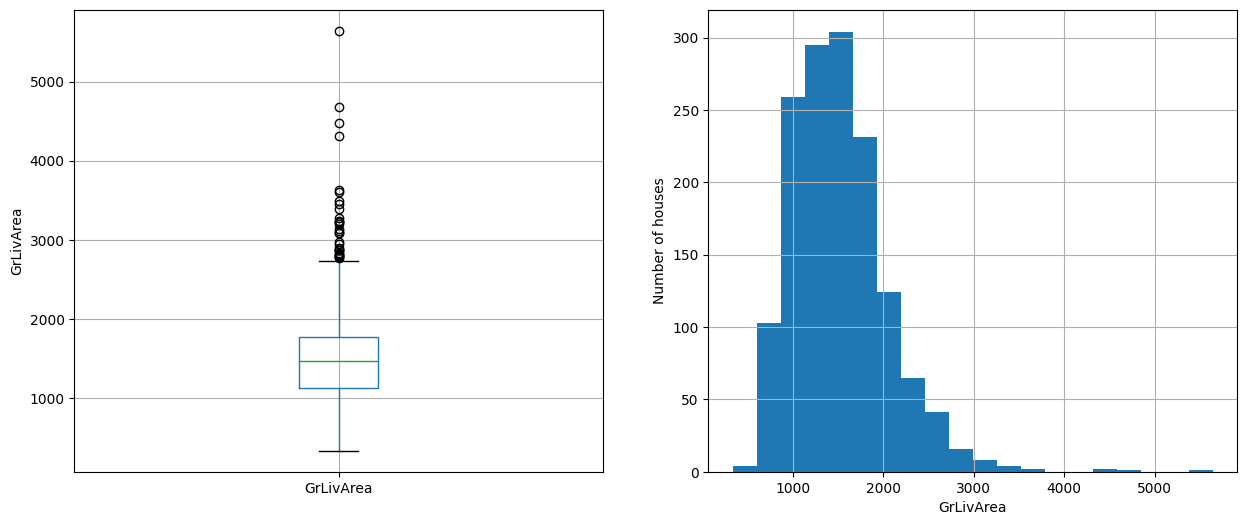

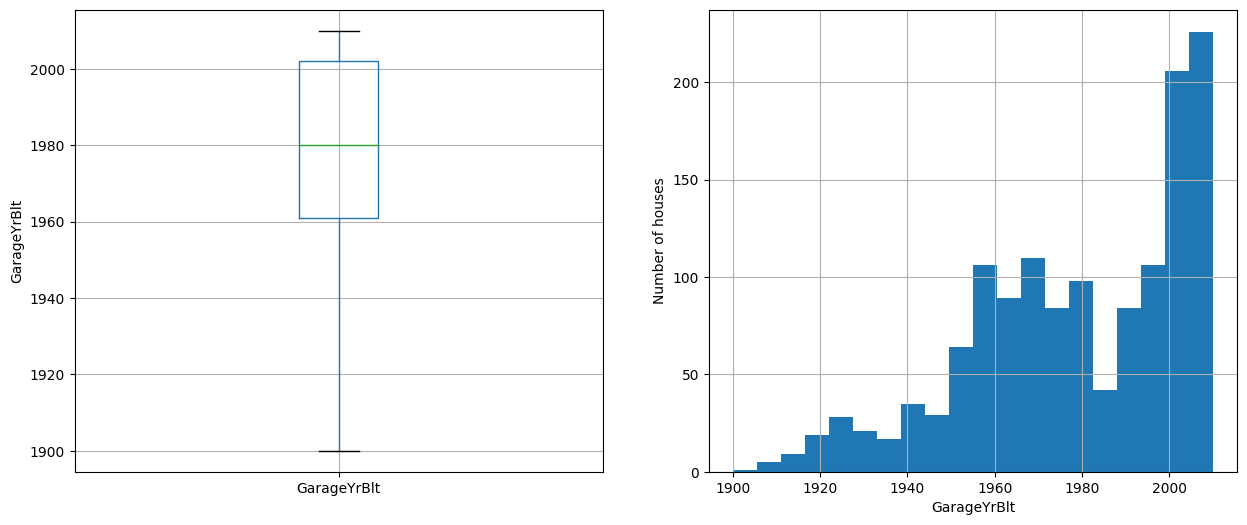

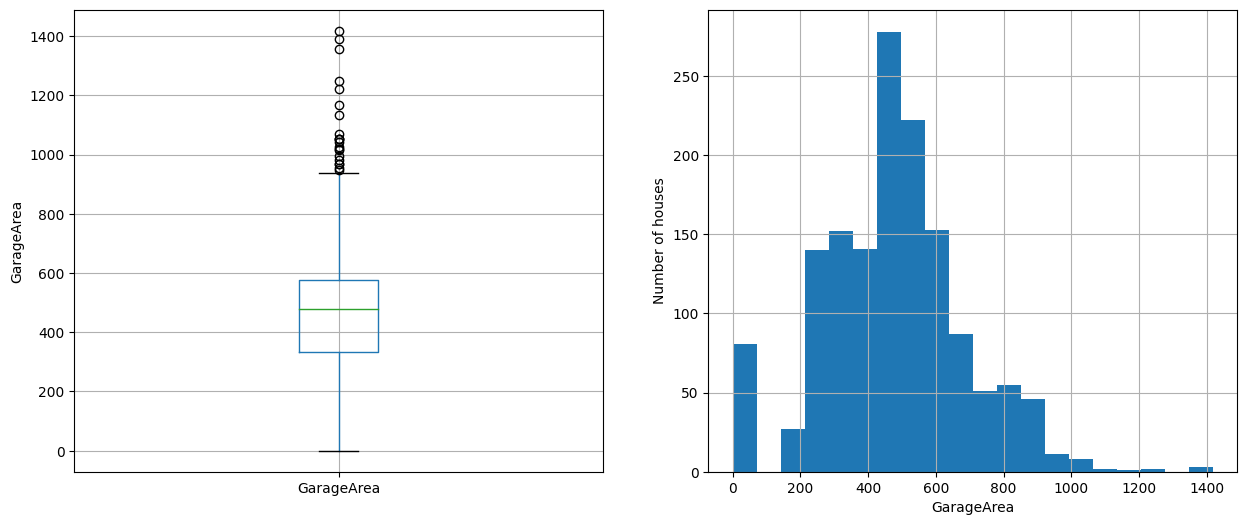

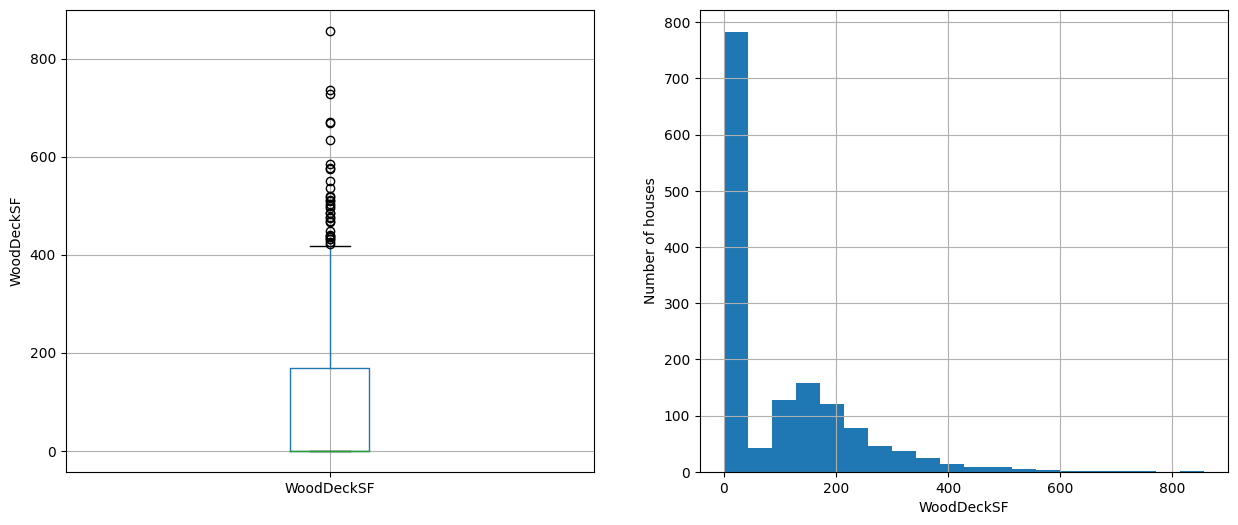

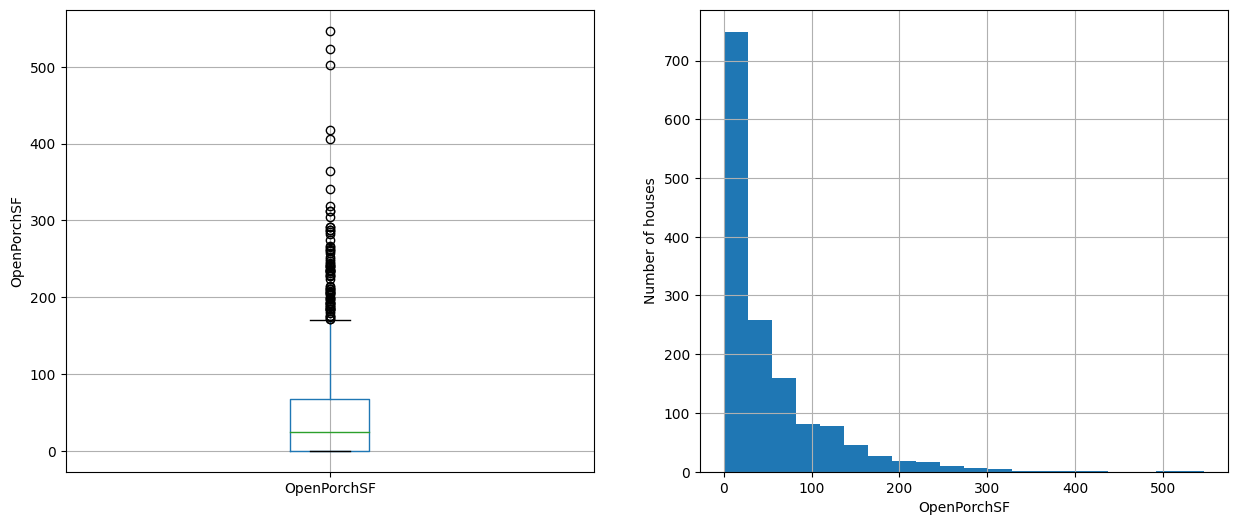

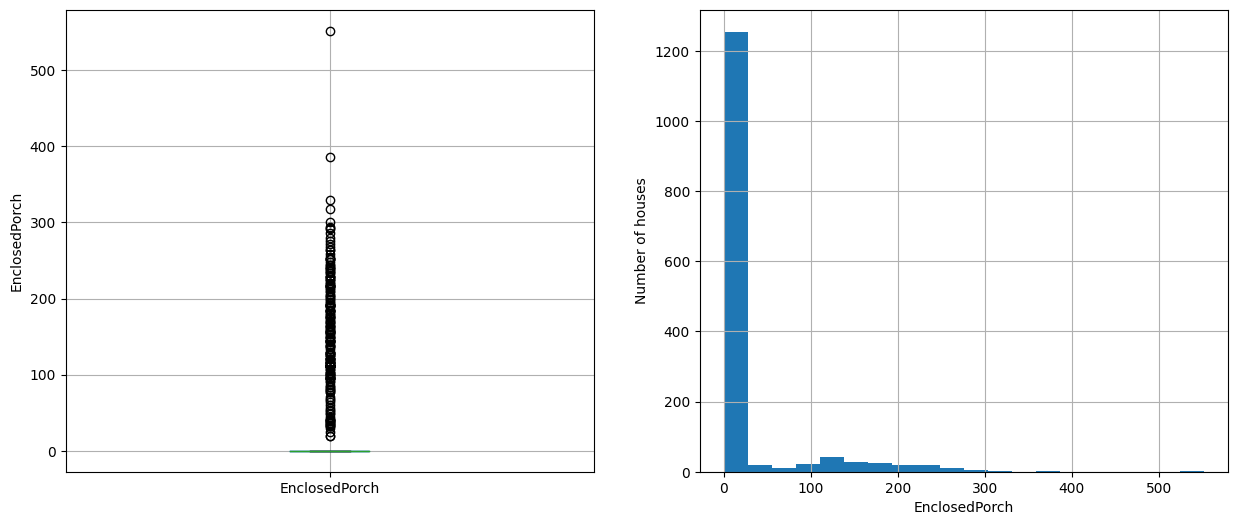

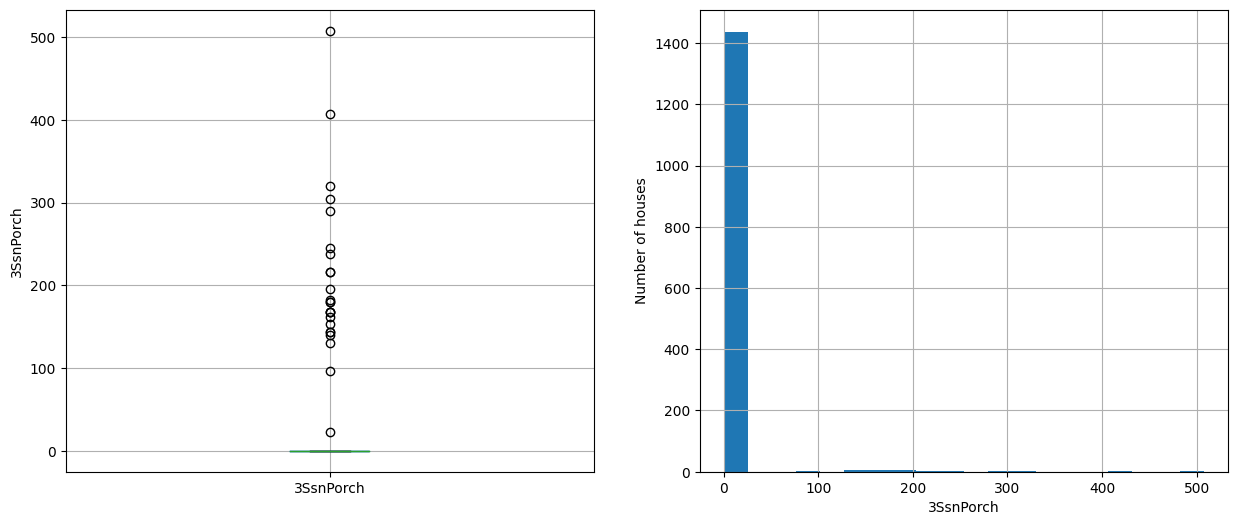

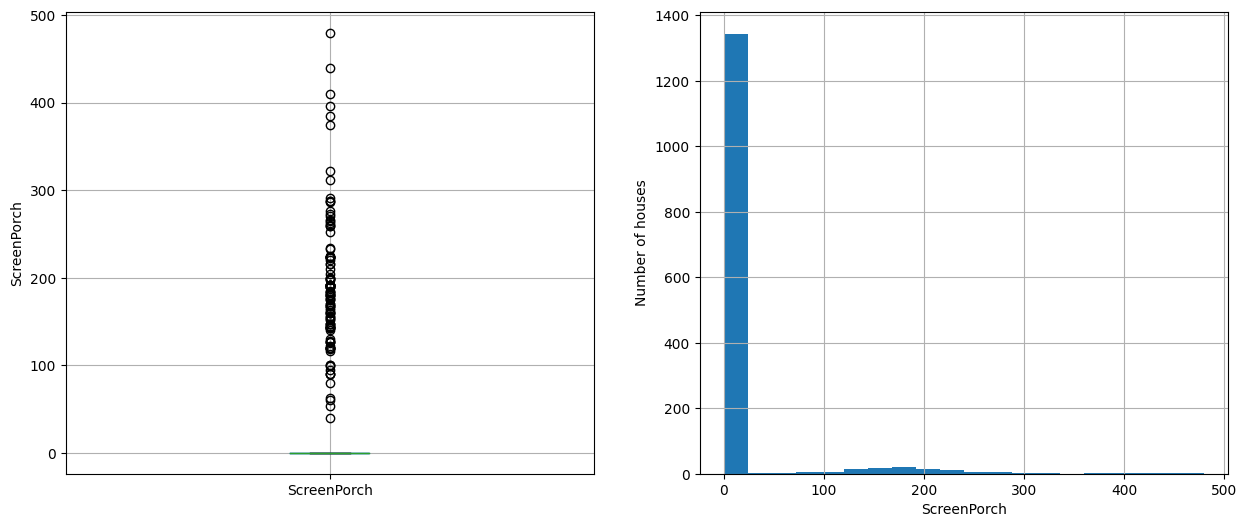

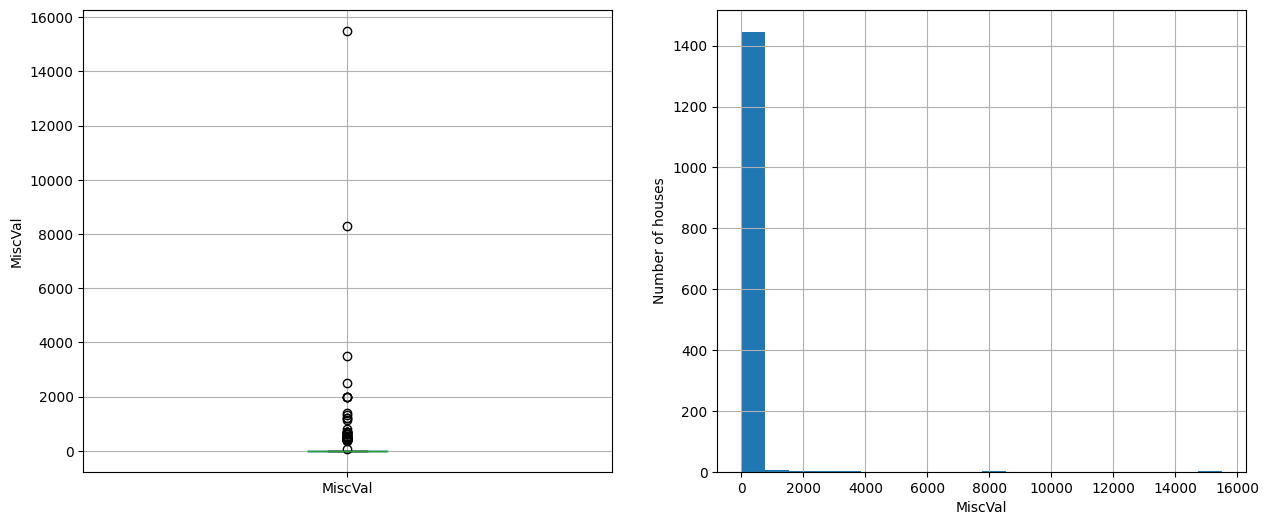

In [12]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

The majority of the continuous variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. If we are planning to build linear regression, we might need to tackle these to improve the model performance. To tackle the 2 aspects together, I will do discretisation. And in particular, I will use trees to find the right buckets onto which I will divide the variables.

#### Outlies in discrete variables

Let's calculate the percentage of houses for each  of the values that can take the discrete variables in the titanic dataset. I will call outliers, those values that are present in less than 1% of the houses. This is exactly the same as finding rare labels in categorical variables. Discrete variables, in essence can be pre-processed / engineered as if they were categorical. Keep this in mind.

In [13]:
# outlies in discrete variables
for var in discrete:
    print(data[var].value_counts() / np.float(len(data)))
    print()

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64

0    0.586301
1    0.402740
2    0.010274
3    0.000685
Name: BsmtFullBath, dtype: float64

0    0.943836
1    0.054795
2    0.001370
Name: BsmtHalfBath, dtype: float64

2    0.526027
1    0.445205
3    0.022603
0    0.006164
Name: FullBath, dtype: float64

0    0.625342
1    0.366438
2    0.008219
Name: HalfBath, dtype: float64

3    0.550685
2    0.245205
4    0.145890
1    0

Most of the discrete variables show values that are shared by a tiny proportion of houses in the dataset. For linear regression, this may not be a problem, but it most likely will be for tree methods.


#### Number of labels: cardinality

In [14]:
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

MSZoning  contains  5  labels
Street  contains  2  labels
Alley  contains  3  labels
LotShape  contains  4  labels
LandContour  contains  4  labels
Utilities  contains  2  labels
LotConfig  contains  5  labels
LandSlope  contains  3  labels
Neighborhood  contains  25  labels
Condition1  contains  9  labels
Condition2  contains  8  labels
BldgType  contains  5  labels
HouseStyle  contains  8  labels
RoofStyle  contains  6  labels
RoofMatl  contains  8  labels
Exterior1st  contains  15  labels
Exterior2nd  contains  16  labels
MasVnrType  contains  5  labels
ExterQual  contains  4  labels
ExterCond  contains  5  labels
Foundation  contains  6  labels
BsmtQual  contains  5  labels
BsmtCond  contains  5  labels
BsmtExposure  contains  5  labels
BsmtFinType1  contains  7  labels
BsmtFinType2  contains  7  labels
Heating  contains  6  labels
HeatingQC  contains  5  labels
CentralAir  contains  2  labels
Electrical  contains  6  labels
KitchenQual  contains  4  labels
Functional  contains  7 

Most of the variables, contain only a few labels. Then, we do not have to deal with high cardinality. That is good news!

### Separate train and test set

In [15]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((1168, 81), (292, 81))

### Engineering missing values in numerical variables (section 5)
#### Continuous variables

In [16]:
# print variables with missing data
for col in continuous:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

LotFrontage 0.1815068493150685
MasVnrArea 0.005136986301369863
GarageYrBlt 0.04965753424657534


- LotFrontage and GarageYrBlt: create additional variable with NA + median imputation
- CMasVnrArea: median imputation

In [17]:
# add variable indicating missingness + median imputation
for df in [X_train, X_test, submission]:
    for var in ['LotFrontage', 'GarageYrBlt']:
        df[var+'_NA'] = np.where(df[var].isnull(), 1, 0)
        df[var].fillna(X_train[var].median(), inplace=True) 

for df in [X_train, X_test, submission]:
    df.MasVnrArea.fillna(X_train.MasVnrArea.median(), inplace=True)

#### Discrete variables

In [18]:
# print variables with missing data
for col in discrete:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

There are no missing data in the discrete variables. Good, then we don't have to engineer them.

### Engineering Missing Data in categorical variables (section 6)

In [19]:
# print variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Alley 0.9392123287671232
MasVnrType 0.005136986301369863
BsmtQual 0.023972602739726026
BsmtCond 0.023972602739726026
BsmtExposure 0.023972602739726026
BsmtFinType1 0.023972602739726026
BsmtFinType2 0.02482876712328767
Electrical 0.0008561643835616438
FireplaceQu 0.4717465753424658
GarageType 0.04965753424657534
GarageFinish 0.04965753424657534
GarageQual 0.04965753424657534
GarageCond 0.04965753424657534
PoolQC 0.9965753424657534
Fence 0.8167808219178082
MiscFeature 0.9580479452054794


I will add a 'Missing' Label to all of them. If the missing data are rare, I will handle those together with rare labels in a subsequent engineering step.

In [20]:
# add label indicating 'Missing' to categorical variables

for df in [X_train, X_test, submission]:
    for var in categorical:
        df[var].fillna('Missing', inplace=True)

In [21]:
# check absence of null values
for var in X_train.columns:
    if X_train[var].isnull().sum()>0:
        print(var, X_train[var].isnull().sum())

In [22]:
# check absence of null values
for var in X_train.columns:
    if X_test[var].isnull().sum()>0:
        print(var, X_test[var].isnull().sum())

In [23]:
# check absence of null values
submission_vars = []
for var in X_train.columns:
    if var!='SalePrice' and submission[var].isnull().sum()>0:
        print(var, submission[var].isnull().sum())
        submission_vars.append(var)

BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageCars 1
GarageArea 1


In [24]:
# Fare in the submission dataset contains one null value, I will replace it by the median 
for var in submission_vars:
    submission[var].fillna(X_train[var].median(), inplace=True)

### Outliers in Numerical variables (15)

In order to tackle outliers and skewed distributions at the same time, I suggested I would do discretisation. And in order to find the optimal buckets automatically, I would use decision trees to find the buckets for me.

In [25]:
def tree_binariser(var):
    score_ls = [] # here I will store the mse

    for tree_depth in [1,2,3,4]:
        # call the model
        tree_model = DecisionTreeRegressor(max_depth=tree_depth)

        # train the model using 3 fold cross validation
        scores = cross_val_score(tree_model, X_train[var].to_frame(), y_train, cv=3, scoring='neg_mean_squared_error')
        score_ls.append(np.mean(scores))

    # find depth with smallest mse
    depth = [1,2,3,4][np.argmax(score_ls)]
    #print(score_ls, np.argmax(score_ls), depth)

    # transform the variable using the tree
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train[var].to_frame(), X_train.SalePrice)
    X_train[var] = tree_model.predict(X_train[var].to_frame())
    X_test[var] = tree_model.predict(X_test[var].to_frame())
    submission[var] =  tree_model.predict(submission[var].to_frame())

In [26]:
for var in continuous:
    tree_binariser(var)

In [27]:
X_train[continuous].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
618,244774.580000,215854.852814,254712.211111,231942.797101,234430.248963,162693.417544,181949.470919,283420.571429,271695.020833,325504.423077,170728.974203,180556.807198,199700.782235,251948.409639,274927.700000,157482.765625,221545.352423,187096.857573,180269.684896,217936.589286,182034.509821
870,143409.933333,142922.191142,149604.171756,145548.741497,156067.643564,162693.417544,181949.470919,160164.021505,156267.219925,146426.575406,170728.974203,180556.807198,124728.476821,154389.937294,129813.178082,157482.765625,144015.982759,187096.857573,180269.684896,178939.159173,182034.509821
92,181337.643952,215854.852814,131510.402477,231942.797101,156067.643564,196331.633333,181949.470919,184078.475884,156267.219925,146426.575406,170728.974203,180556.807198,124728.476821,138503.159184,176900.146617,157482.765625,144015.982759,142394.476190,180269.684896,178939.159173,182034.509821
817,181337.643952,215854.852814,224159.198813,201707.040000,185895.184080,269568.187500,181949.470919,184078.475884,240148.982143,229591.006289,170728.974203,180556.807198,199700.782235,216624.805930,303610.295455,195914.158228,221545.352423,187096.857573,180269.684896,178939.159173,182034.509821
302,244774.580000,215854.852814,224159.198813,201707.040000,185895.184080,162693.417544,181949.470919,233388.564103,240148.982143,229591.006289,170728.974203,180556.807198,199700.782235,216624.805930,303610.295455,219441.075075,221545.352423,187096.857573,180269.684896,178939.159173,182034.509821


In [28]:
for var in continuous:
    print(var, len(X_train[var].unique()))

LotFrontage 4
LotArea 4
YearBuilt 8
YearRemodAdd 16
MasVnrArea 4
BsmtFinSF1 4
BsmtFinSF2 4
BsmtUnfSF 8
TotalBsmtSF 8
1stFlrSF 8
2ndFlrSF 14
LowQualFinSF 2
GrLivArea 8
GarageYrBlt 8
GarageArea 8
WoodDeckSF 4
OpenPorchSF 4
EnclosedPorch 6
3SsnPorch 4
ScreenPorch 2
MiscVal 2


### Engineering rare labels in categorical and discrete variables (section 9)

In [29]:
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
    submission[variable] = np.where(submission[variable].isin(frequent_cat), submission[variable], 'Rare')

In [30]:
for var in ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']:
    submission[var] = submission[var].astype('int')

In [31]:
# find infrequent labels in categorical variables
for var in categorical:
    rare_imputation(var)
    
for var in discrete:
    rare_imputation(var)

In [32]:
for var in X_train.columns:
    if var!='SalePrice' and submission[var].isnull().sum()>0:
        print(var, submission[var].isnull().sum())
        submission_vars.append(var)

In [33]:
# let's check that it worked
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

MSZoning RL      0.788527
RM      0.148973
FV      0.041952
Rare    0.020548
Name: MSZoning, dtype: float64

Street Pave    0.995719
Rare    0.004281
Name: Street, dtype: float64

Alley Missing    0.939212
Grvl       0.031678
Rare       0.029110
Name: Alley, dtype: float64

LotShape Reg     0.629281
IR1     0.339041
Rare    0.031678
Name: LotShape, dtype: float64

LandContour Lvl     0.902397
Rare    0.054795
Bnk     0.042808
Name: LandContour, dtype: float64

Utilities AllPub    0.999144
Rare      0.000856
Name: Utilities, dtype: float64

LotConfig Inside     0.727740
Corner     0.175514
CulDSac    0.065068
FR2        0.030822
Rare       0.000856
Name: LotConfig, dtype: float64

LandSlope Gtl     0.941781
Mod     0.047089
Rare    0.011130
Name: LandSlope, dtype: float64

Neighborhood Rare       0.186644
NAmes      0.151541
CollgCr    0.099315
OldTown    0.076199
Edwards    0.068493
Somerst    0.058219
Sawyer     0.055651
Gilbert    0.054795
NridgHt    0.052226
NWAmes     0.047945
BrkS

In [34]:
for var in X_train.columns:
    if var!='SalePrice' and submission[var].isnull().sum()>0:
        print(var, submission[var].isnull().sum())

### Encode categorical and discrete variables (section 10)

In [35]:
def encode_categorical_variables(var, target):
        # make label to price dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
        submission[var] = submission[var].map(ordered_labels)

# encode labels in categorical vars
for var in categorical:
    encode_categorical_variables(var, 'SalePrice')
    
# encode labels in discrete vars
for var in discrete:
    encode_categorical_variables(var, 'SalePrice')

In [36]:
for var in X_train.columns:
    if var!='SalePrice' and submission[var].isnull().sum()>0:
        print(var, submission[var].isnull().sum())

In [37]:
#let's inspect the dataset
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
618,619,184802.941860,191112.542888,244774.580000,215854.852814,181009.158212,183253.524157,164502.708844,180625.987666,180846.010283,176705.292941,179862.495455,315236.573770,183885.405113,180922.02069,185725.392457,175539.977547,294733.390625,201734.593272,254712.211111,231942.797101,218227.529661,179436.582897,225259.960000,229469.960000,205957.144970,234430.248963,367868.461538,183378.131707,225829.750000,326039.521277,183242.204589,204721.362069,236226.845455,162693.417544,184622.364905,181949.470919,283420.571429,271695.020833,181709.111986,214993.06599,186158.813761,187028.395283,325504.423077,170728.974203,180556.807198,199700.782235,165594.030612,180971.578281,213551.978964,162845.735172,180756.652713,183217.146057,213800.800866,253864.338710,183816.463235,211926.204981,226208.555932,202098.170977,251948.409639,142893.495902,308849.062500,274927.700000,187095.717536,187740.811853,186730.340206,157482.765625,221545.352423,187096.857573,180269.684896,217936.589286,180689.71134,180689.71134,187571.216981,182078.329759,182034.509821,183938.518519,187530.407692,280094.270833,278236.510204,314813,0,0
870,871,184802.941860,191112.542888,143409.933333,142922.191142,181009.158212,183253.524157,164502.708844,180625.987666,180846.010283,176705.292941,179862.495455,145902.220339,170342.022472,180922.02069,185725.392457,175539.977547,133553.796238,201734.593272,149604.171756,145548.741497,218227.529661,179436.582897,147198.689024,147184.906250,155107.126961,156067.643564,145264.598080,183378.131707,149658.235644,141287.297348,183242.204589,166756.434896,169607.705382,162693.417544,184622.364905,181949.470919,160164.021505,156267.219925,181709.111986,155514.22449,106047.269231,187028.395283,146426.575406,170728.974203,180556.807198,124728.476821,165594.030612,180971.578281,134247.150289,162845.735172,157600.802817,183217.146057,140522.540268,140217.388889,183816.463235,141205.366606,141205.366606,135245.717460,154389.937294,142893.495902,127151.030100,129813.178082,187095.717536,187740.811853,186730.340206,157482.765625,144015.982759,187096.857573,180269.684896,178939.159173,180689.71134,180689.71134,187571.216981,182078.329759,182034.509821,185801.122222,177176.490421,172945.844946,174634.731682,109500,0,0
92,93,96493.392857,191112.542888,181337.643952,215854.852814,181009.158212,121154.162162,205860.732323,214412.765625,180846.010283,176705.292941,179862.495455,216634.675000,183885.405113,180922.02069,185725.392457,175539.977547,133553.796238,161106.354430,131510.402477,231942.797101,170921.710497,179436.582897,145071.171429,145788.491124,155107.126961,156067.643564,145264.598080,176193.377193,134111.008000,203596.697959,183242.204589,166756.434896,161924.273256,196331.633333,184622.364905,181949.470919,184078.475884,156267.219925,181709.111986,214993.06599,186158.813761,187028.395283,146426.575406,170728.974203,180556.807198,124728.476821,202420.555085,180971.578281,134247.150289,162845.735172,157600.802817,183217.146057,140522.540268,140217.388889,183816.463235,141205.366606,141205.366606,135245.717460,138503.159184,142893.495902,184299.762406,176900.146617,1

We can see that the labels have now been replaced by the mean house price.

### Feature scaling (section 13)

In [38]:
X_train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,738.685788,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,0.181507,0.049658
std,421.609683,38480.990758,25720.477372,33736.046396,37115.680039,3055.507893,11140.998208,21889.220846,11298.306442,1268.316692,11199.613349,3929.532340,45860.552169,9128.523689,1362.749348,14168.223861,22145.611412,55164.787624,24583.702981,49618.871670,43963.319552,18957.714577,9908.801138,31675.032788,31237.129369,35361.242793,39197.954278,53953.879151,11793.776051,40189.096743,53501.729438,18860.218446,29723.844614,36637.286166,40718.777833,10001.037180,9020.532512,27800.843566,53928.565770,6089.538646,35198.761059,20007.775506,19586.684249,51714.876682,43508.967190,8615.492267,57496.683423,18160.012243,1637.443705,44259.676776,23230.103527,18963.116711,11184.030580,52529.934030,39490.667509,11096.100031,38140.877100,38095.625026,38765.020398,47983.619169,42784.463581,55753.813144,54314.602977,22515.160301,22447.174795,19383.388123,27523.829396,35638.561525,18039.742483,6238.054701,8335.382737,2034.059631,2034.059631,16127.286579,6184.091

In [39]:
training_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]

In [40]:
# fit scaler
scaler = StandardScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set for later use

StandardScaler()

The scaler is now ready, we can use it in a machine learning algorithm when required. See below.

### Machine Learning algorithm building

#### xgboost

In [41]:
xgb_model = xgb.XGBRegressor()

eval_set = [(X_test[training_vars], y_test)]
xgb_model.fit(X_train[training_vars], y_train, eval_set=eval_set, verbose=False)

pred = xgb_model.predict(X_train[training_vars])
print('xgb train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = xgb_model.predict(X_test[training_vars])
print('xgb test mse: {}'.format(mean_squared_error(y_test, pred)))

xgb train mse: 3019919.984008397
xgb test mse: 906819139.0567508


#### Random Forests

In [42]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train[training_vars], y_train)

pred = rf_model.predict(X_train[training_vars])
print('rf train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = rf_model.predict(X_test[training_vars])
print('rf test mse: {}'.format(mean_squared_error(y_test, pred)))

rf train mse: 115590841.7575266
rf test mse: 855780434.4816904


#### Support vector machine

In [43]:
SVR_model = SVR()
SVR_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = SVR_model.predict(scaler.transform(X_train[training_vars]))
print('SVR train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = SVR_model.predict(scaler.transform(X_test[training_vars]))
print('SVR test mse: {}'.format(mean_squared_error(y_test, pred)))

SVR train mse: 6466993596.796061
SVR test mse: 7236778915.478487


#### Regularised linear regression

In [44]:
lin_model = Lasso(random_state=2909)
lin_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = lin_model.predict(scaler.transform(X_train[training_vars]))
print('linear train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = lin_model.predict(scaler.transform(X_test[training_vars]))
print('linear test mse: {}'.format(mean_squared_error(y_test, pred)))

linear train mse: 583103463.5841159
linear test mse: 1278856185.8603215


### Submission to Kaggle

In [45]:
pred_ls = []
for model in [xgb_model, rf_model]:
    pred_ls.append(pd.Series(model.predict(submission[training_vars])))

pred = SVR_model.predict(scaler.transform(submission[training_vars]))
pred_ls.append(pd.Series(pred))

pred = lin_model.predict(scaler.transform(submission[training_vars]))
pred_ls.append(pd.Series(pred))

final_pred = pd.concat(pred_ls, axis=1).mean(axis=1)

In [46]:
temp = pd.concat([submission.Id, final_pred], axis=1)
temp.columns = ['Id', 'SalePrice']
temp.head()

,Id,SalePrice
0,1461,124564.483038
1,1462,160373.948292
2,1463,177776.552734
3,1464,180447.758825
4,1465,176790.041518


In [47]:
temp.to_csv('submit_housesale.csv', index=False)

### Feature importance

<Axes: >

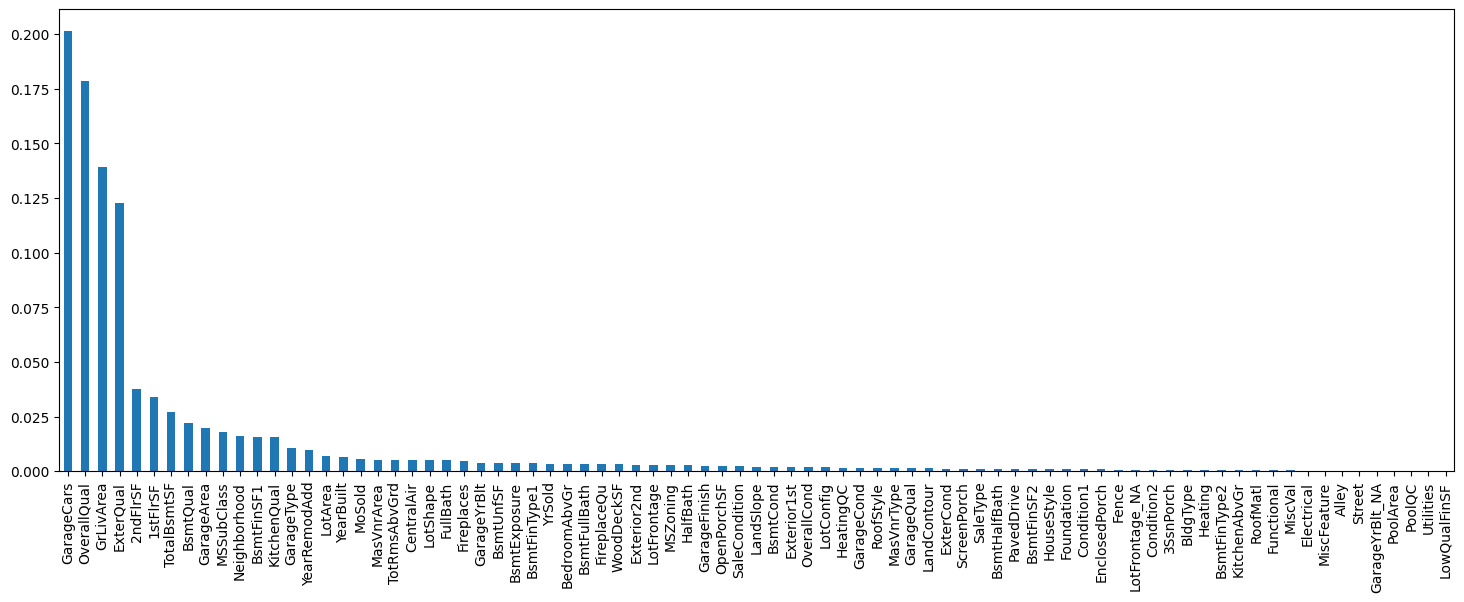

In [48]:
importance = pd.Series(rf_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))

<Axes: >

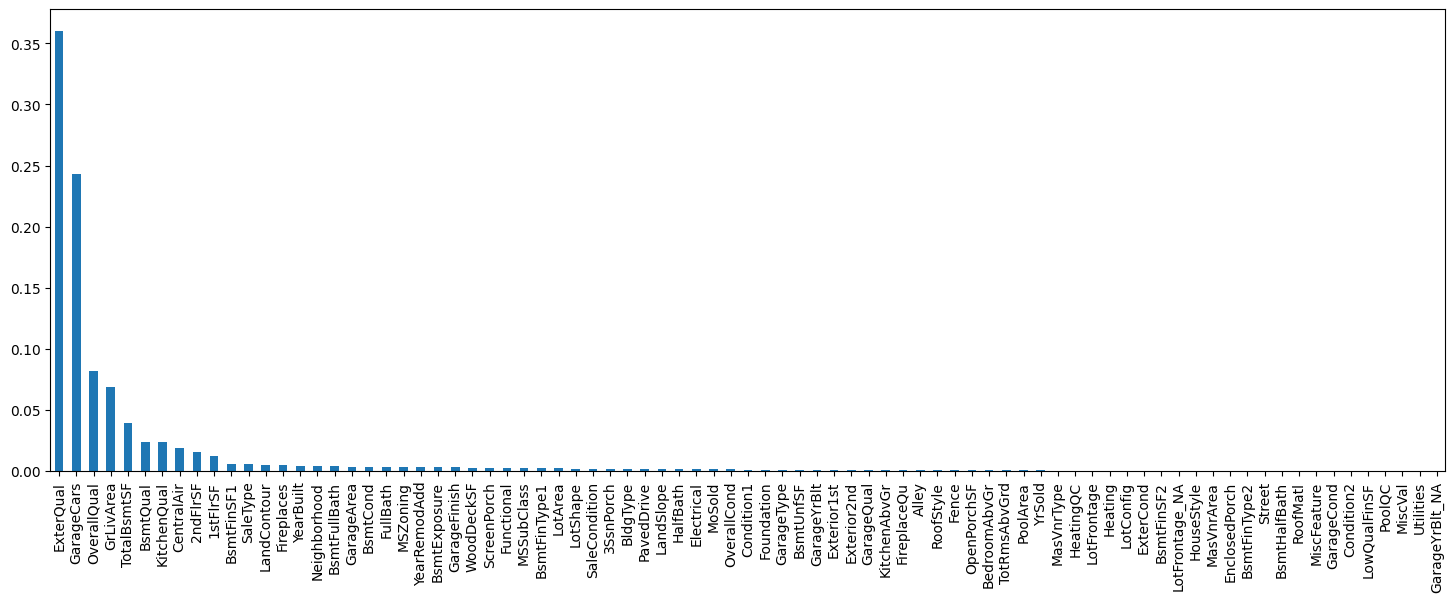

In [49]:
importance = pd.Series(xgb_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))

<Axes: >

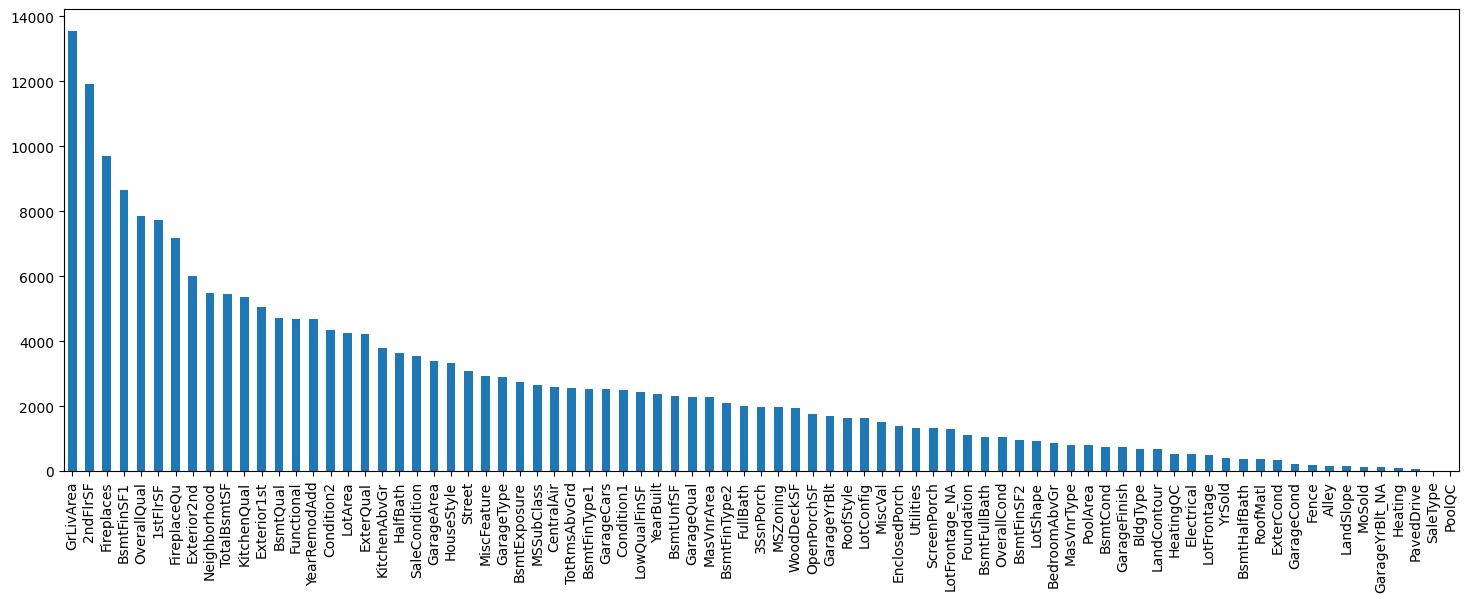

In [50]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))